In [5]:
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Load CSV file into a DataFrame
df = pd.read_csv('../dataset/new_data.csv')

# Display the first few rows of the DataFrame
print(df.head())


               Country ISO3   1961   1962   1963   1964   1965   1966   1967  \
0              Albania  ALB  0.627  0.326  0.075 -0.166 -0.388  0.559 -0.074   
1              Algeria  DZA  0.164  0.114  0.077  0.250 -0.100  0.433 -0.026   
2       American Samoa  ASM  0.079 -0.042  0.169 -0.140 -0.562  0.181 -0.368   
3               Angola  AGO  0.041 -0.152 -0.190 -0.229 -0.196  0.175 -0.081   
4  Antigua and Barbuda  ATG  0.090  0.031  0.288  0.214 -0.385  0.097 -0.192   

    1968  ...   2017   2018   2019   2020   2021   2022  \
0  0.081  ...  1.121  2.028  1.675  1.498  1.536  1.518   
1 -0.067  ...  1.512  1.210  1.115  1.926  2.330  1.688   
2 -0.187  ...  1.435  1.189  1.539  1.430  1.268  1.256   
3 -0.193  ...  0.870  1.395  1.752  1.162  1.553  1.212   
4 -0.225  ...  0.958  0.627  0.797  1.131  0.862  0.770   

                   Sub-Region         Income Group  Area (KM²)  Density (KM²)  
0       Europe & Central Asia  Upper middle income     28748.0            103  
1  M

In [7]:
df["Sub-Region"].value_counts(normalize = True)

Sub-Region
Europe & Central Asia         0.248227
Latin America & Caribbean     0.219858
Sub-Saharan Africa            0.212766
East Asia & Pacific           0.148936
Middle East & North Africa    0.106383
South Asia                    0.049645
North America                 0.014184
Name: proportion, dtype: float64

In [8]:
df["Income Group"].value_counts(normalize = True)

Income Group
High income            0.397163
Lower middle income    0.255319
Upper middle income    0.248227
Low income             0.099291
Name: proportion, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np

In [10]:
df_num = df.select_dtypes(include= np.number)
df_num.head()

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2015,2016,2017,2018,2019,2020,2021,2022,Area (KM²),Density (KM²)
0,0.627,0.326,0.075,-0.166,-0.388,0.559,-0.074,0.081,-0.013,-0.106,...,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518,28748.0,103
1,0.164,0.114,0.077,0.250,-0.100,0.433,-0.026,-0.067,0.291,0.116,...,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688,2381741.0,19
2,0.079,-0.042,0.169,-0.140,-0.562,0.181,-0.368,-0.187,0.132,-0.047,...,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256,199.0,220
3,0.041,-0.152,-0.190,-0.229,-0.196,0.175,-0.081,-0.193,0.188,0.248,...,1.331,1.609,0.870,1.395,1.752,1.162,1.553,1.212,1246700.0,29
4,0.090,0.031,0.288,0.214,-0.385,0.097,-0.192,-0.225,0.271,0.109,...,1.035,1.097,0.958,0.627,0.797,1.131,0.862,0.770,442.0,214


In [11]:
X = df_num
y = df["Sub-Region"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

In [13]:
y_train.value_counts(dropna = False, normalize=  True)

Sub-Region
Europe & Central Asia         0.250000
Latin America & Caribbean     0.223214
Sub-Saharan Africa            0.214286
East Asia & Pacific           0.151786
Middle East & North Africa    0.107143
South Asia                    0.044643
North America                 0.008929
Name: proportion, dtype: float64

In [14]:
y_test.value_counts(dropna = False, normalize=  True)

Sub-Region
Europe & Central Asia         0.241379
Sub-Saharan Africa            0.206897
Latin America & Caribbean     0.206897
East Asia & Pacific           0.137931
Middle East & North Africa    0.103448
South Asia                    0.068966
North America                 0.034483
Name: proportion, dtype: float64

In [15]:
svc = SVC(random_state = 0, C = 100000)
svc.fit(X_train, y_train)

SVC(C=100000, random_state=0)

In [16]:
y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

RESULTADO TREINO
                            precision    recall  f1-score   support

       East Asia & Pacific       0.67      0.12      0.20        17
     Europe & Central Asia       0.29      0.96      0.45        28
 Latin America & Caribbean       0.83      0.20      0.32        25
Middle East & North Africa       0.67      0.17      0.27        12
             North America       1.00      1.00      1.00         1
                South Asia       1.00      0.20      0.33         5
        Sub-Saharan Africa       0.83      0.21      0.33        24

                  accuracy                           0.38       112
                 macro avg       0.76      0.41      0.42       112
              weighted avg       0.66      0.38      0.34       112



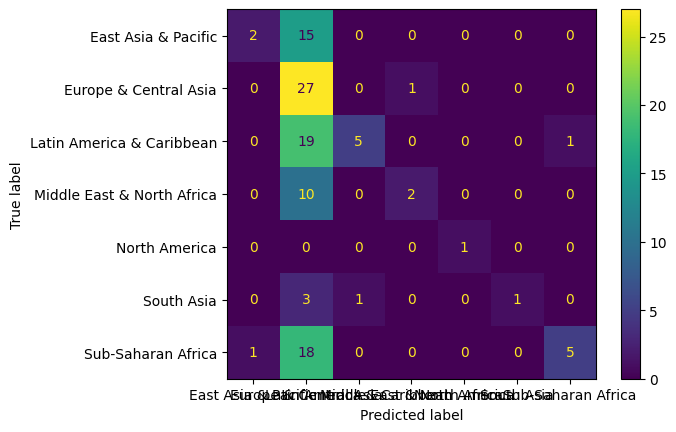

In [18]:
print("RESULTADO TREINO")

print(classification_report(y_train , y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)

RESULTADO TEST
                            precision    recall  f1-score   support

       East Asia & Pacific       0.33      0.25      0.29         4
     Europe & Central Asia       0.32      1.00      0.48         7
 Latin America & Caribbean       0.00      0.00      0.00         6
Middle East & North Africa       0.00      0.00      0.00         3
             North America       1.00      1.00      1.00         1
                South Asia       0.00      0.00      0.00         2
        Sub-Saharan Africa       0.00      0.00      0.00         6

                  accuracy                           0.31        29
                 macro avg       0.24      0.32      0.25        29
              weighted avg       0.16      0.31      0.19        29



c:\Users\Nugrinho\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Nugrinho\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Nugrinho\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

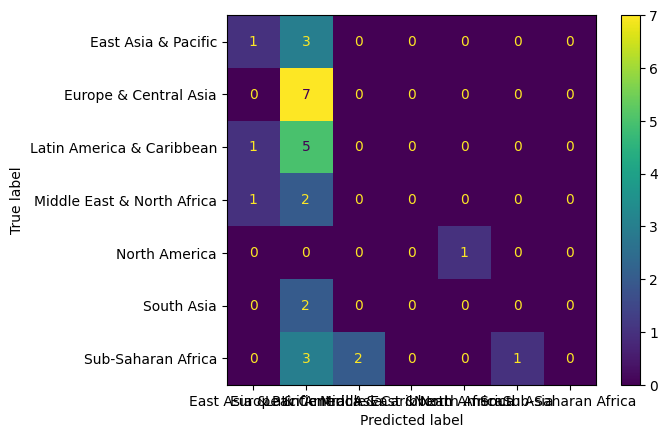

In [19]:
print("RESULTADO TEST")

print(classification_report(y_test , y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)

In [20]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import  SimpleImputer

from sklearn.metrics import confusion_matrix

In [21]:
def pipe_pre_process(df):
    X = df.select_dtypes(include= np.number)
    y = df["Sub-Region"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 0, stratify = y)

    # tratamento dos dados numericos 
    pipe_features_num = Pipeline([
        ("input_num", SimpleImputer(strategy = "mean")),
        ("scaler", StandardScaler())    
    ])

    # pegando o nome das variáveis numéricas
    features_num = X_train.select_dtypes(include = np.number).columns.tolist()

    # tratamento dos dados categoricos
    pipe_features_cat = Pipeline([
        ("input_cat", SimpleImputer(strategy = "constant", fill_value = "unknown")),
        ("one_hot", OneHotEncoder())
    ])

    # pegando o nome das variáveis categoricas
    features_cat = X_train.select_dtypes(exclude = np.number).columns.tolist()

    pre_processador = ColumnTransformer([
        ("transf_num", pipe_features_num, features_num),
        ("transf_cat", pipe_features_cat, features_cat)
    ])
    
    return X_train, X_test, y_train, y_test, pre_processador

In [22]:
X_train, X_test, y_train, y_test, pre_processador = pipe_pre_process(df)

In [23]:
def metricas_classificacao(estimator):
    #=================
    print("\nMétricas da avaliação de treino:")
    
    y_pred_train = estimator.predict(X_train) # predição sobre os dados de treinamento
    
    print(confusion_matrix(y_train, y_pred_train)) # matriz de confusão
    
    ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
    plt.show()
    
    print(classification_report(y_train, y_pred_train))
    
    #=================
    print("\nMétricas da avaliação de teste:")
    
    y_pred_test = estimator.predict(X_test) # predição sobre os dados de treinamento
    
    print(confusion_matrix(y_test, y_pred_test)) # matriz de confusão
    
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
    plt.show()
    
    print(classification_report(y_test, y_pred_test))

In [26]:
metricas_classificacao(pipe_svc)


Métricas da avaliação de treino:


NotFittedError: This ColumnTransformer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [25]:
# Primeiro, vamos usar nossa função de pré-processamento dos dados
X_train, X_test, y_train, y_test, pre_processador = pipe_pre_process(df)

# Preparando os dados e instanciando o modelo
pipe_svc = Pipeline([('pre_process', pre_processador),
                    ('svc', SVC(random_state=0))]) # valores-padrão: kernel = 'rbf', C = '1', gamma = 'scale'

In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [ ]:
# Escolhendo os parâmetros para o gridsearch
param_grid_svc = {"svc__kernel": ["linear", "rbf", "poly"],
                 "svc__C": np.logspace(-2,2,5),
                 "svc__gamma": np.logspace(-2,2,5)}

splitter = StratifiedKFold(n_splits=5, shuffle = True, random_state = 42)

grid_svc = GridSearchCV(estimator= pipe_svc,
                       param_grid= param_grid_svc,
                       cv=splitter,
                       verbose= 10,
                       n_jobs= -1)
grid_svc.fit(X_train, y_train)

In [ ]:
grid_svc.best_params_

In [ ]:
metricas_classificacao(grid_svc)